In [85]:
import pandas as pd
import requests
from io import StringIO
import seaborn as sns
import re
import matplotlib.pyplot as plt

1. Leer los datos desde una página web.

In [86]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

resp = requests.get(url)
resp.raise_for_status()

col_names = ["ID", "Diagnosis"] + [f"{feat}{i}" for feat in (
    "radius", "texture", "perimeter", "area", "smoothness",
    "compactness", "concavity", "concave_points", "symmetry", "fractal_dimension"
) for i in ["_mean", "_se", "_worst"]]

df = pd.read_csv(StringIO(resp.text), header=None, names=col_names)

df

,ID,Diagnosis,radius_mean,radius_se,radius_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,...,concavity_worst,concave_points_mean,concave_points_se,concave_points_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [87]:
print("Tamaño original:", df.shape)

Tamaño original: (569, 32)


En el anterior código se obtiene la información del dataset, lista para ser usada, con muchos posibles fines.

2. Renombrar las columnas en formato PascalCase.


In [88]:
col_pascal = 'ID'
df.rename(columns={'ID': col_pascal}, inplace=True)

col_pascal = 'Diagnosis'
df.rename(columns={'Diagnosis': col_pascal}, inplace=True)

col_pascal = 'RadiusMean'
df.rename(columns={'radius_mean': col_pascal}, inplace=True)

col_pascal = 'RadiusSe'
df.rename(columns={'radius_se': col_pascal}, inplace=True)

col_pascal = 'RadiusWorst'
df.rename(columns={'radius_worst': col_pascal}, inplace=True)

col_pascal = 'TextureMean'
df.rename(columns={'texture_mean': col_pascal}, inplace=True)

col_pascal = 'TextureSe'
df.rename(columns={'texture_se': col_pascal}, inplace=True)

col_pascal = 'TextureWorst'
df.rename(columns={'texture_worst': col_pascal}, inplace=True)

col_pascal = 'PerimeterMean'
df.rename(columns={'perimeter_mean': col_pascal}, inplace=True)

col_pascal = 'PerimeterSe'
df.rename(columns={'perimeter_se': col_pascal}, inplace=True)

col_pascal = 'PerimeterWorst'
df.rename(columns={'perimeter_worst': col_pascal}, inplace=True)

col_pascal = 'AreaMean'
df.rename(columns={'area_mean': col_pascal}, inplace=True)

col_pascal = 'AreaSe'
df.rename(columns={'area_se': col_pascal}, inplace=True)

col_pascal = 'AreaWorst'
df.rename(columns={'area_worst': col_pascal}, inplace=True)

col_pascal = 'SmoothnessMean'
df.rename(columns={'smoothness_mean': col_pascal}, inplace=True)

col_pascal = 'SmoothnessSe'
df.rename(columns={'smoothness_se': col_pascal}, inplace=True)

col_pascal = 'SmoothnessWorst'
df.rename(columns={'smoothness_worst': col_pascal}, inplace=True)

col_pascal = 'CompactnessMean'
df.rename(columns={'compactness_mean': col_pascal}, inplace=True)

col_pascal = 'CompactnessSe'
df.rename(columns={'compactness_se': col_pascal}, inplace=True)

col_pascal = 'CompactnessWorst'
df.rename(columns={'compactness_worst': col_pascal}, inplace=True)

col_pascal = 'ConcavityMean'
df.rename(columns={'concavity_mean': col_pascal}, inplace=True)

col_pascal = 'ConcavitySe'
df.rename(columns={'concavity_se': col_pascal}, inplace=True)

col_pascal = 'ConcavityWorst'
df.rename(columns={'concavity_worst': col_pascal}, inplace=True)

col_pascal = 'ConcavePointsMean'
df.rename(columns={'concave_points_mean': col_pascal}, inplace=True)

col_pascal = 'ConcavePointsSe'
df.rename(columns={'concave_points_se': col_pascal}, inplace=True)

col_pascal = 'ConcavePointsWorst'
df.rename(columns={'concave_points_worst': col_pascal}, inplace=True)

col_pascal = 'SymmetryMean'
df.rename(columns={'symmetry_mean': col_pascal}, inplace=True)

col_pascal = 'SymmetrySe'
df.rename(columns={'symmetry_se': col_pascal}, inplace=True)

col_pascal = 'SymmetryWorst'
df.rename(columns={'symmetry_worst': col_pascal}, inplace=True)

col_pascal = 'FractalDimensionMean'
df.rename(columns={'fractal_dimension_mean': col_pascal}, inplace=True)

col_pascal = 'FractalDimensionSe'
df.rename(columns={'fractal_dimension_se': col_pascal}, inplace=True)

col_pascal = 'FractalDimensionWorst'
df.rename(columns={'fractal_dimension_worst': col_pascal}, inplace=True)

In [89]:
df

,ID,Diagnosis,RadiusMean,RadiusSe,RadiusWorst,TextureMean,TextureSe,TextureWorst,PerimeterMean,PerimeterSe,...,ConcavityWorst,ConcavePointsMean,ConcavePointsSe,ConcavePointsWorst,SymmetryMean,SymmetrySe,SymmetryWorst,FractalDimensionMean,FractalDimensionSe,FractalDimensionWorst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

In [90]:
df.head()

,ID,Diagnosis,RadiusMean,RadiusSe,RadiusWorst,TextureMean,TextureSe,TextureWorst,PerimeterMean,PerimeterSe,...,ConcavityWorst,ConcavePointsMean,ConcavePointsSe,ConcavePointsWorst,SymmetryMean,SymmetrySe,SymmetryWorst,FractalDimensionMean,FractalDimensionSe,FractalDimensionWorst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [91]:
df.tail()

,ID,Diagnosis,RadiusMean,RadiusSe,RadiusWorst,TextureMean,TextureSe,TextureWorst,PerimeterMean,PerimeterSe,...,ConcavityWorst,ConcavePointsMean,ConcavePointsSe,ConcavePointsWorst,SymmetryMean,SymmetrySe,SymmetryWorst,FractalDimensionMean,FractalDimensionSe,FractalDimensionWorst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [92]:
df.describe()

,ID,RadiusMean,RadiusSe,RadiusWorst,TextureMean,TextureSe,TextureWorst,PerimeterMean,PerimeterSe,PerimeterWorst,...,ConcavityWorst,ConcavePointsMean,ConcavePointsSe,ConcavePointsWorst,SymmetryMean,SymmetrySe,SymmetryWorst,FractalDimensionMean,FractalDimensionSe,FractalDimensionWorst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     569 non-null    int64  
 1   Diagnosis              569 non-null    object 
 2   RadiusMean             569 non-null    float64
 3   RadiusSe               569 non-null    float64
 4   RadiusWorst            569 non-null    float64
 5   TextureMean            569 non-null    float64
 6   TextureSe              569 non-null    float64
 7   TextureWorst           569 non-null    float64
 8   PerimeterMean          569 non-null    float64
 9   PerimeterSe            569 non-null    float64
 10  PerimeterWorst         569 non-null    float64
 11  AreaMean               569 non-null    float64
 12  AreaSe                 569 non-null    float64
 13  AreaWorst              569 non-null    float64
 14  SmoothnessMean         569 non-null    float64
 15  Smooth

In [94]:
df.dtypes

,0
ID,int64
Diagnosis,object
RadiusMean,float64
RadiusSe,float64
RadiusWorst,float64
TextureMean,float64
TextureSe,float64
TextureWorst,float64
PerimeterMean,float64
PerimeterSe,float64


In [95]:
df.columns

Index(['ID', 'Diagnosis', 'RadiusMean', 'RadiusSe', 'RadiusWorst',
       'TextureMean', 'TextureSe', 'TextureWorst', 'PerimeterMean',
       'PerimeterSe', 'PerimeterWorst', 'AreaMean', 'AreaSe', 'AreaWorst',
       'SmoothnessMean', 'SmoothnessSe', 'SmoothnessWorst', 'CompactnessMean',
       'CompactnessSe', 'CompactnessWorst', 'ConcavityMean', 'ConcavitySe',
       'ConcavityWorst', 'ConcavePointsMean', 'ConcavePointsSe',
       'ConcavePointsWorst', 'SymmetryMean', 'SymmetrySe', 'SymmetryWorst',
       'FractalDimensionMean', 'FractalDimensionSe', 'FractalDimensionWorst'],
      dtype='object')

In [96]:
df.shape

(569, 32)

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

In [97]:
print(df.isnull().sum())

ID                       0
Diagnosis                0
RadiusMean               0
RadiusSe                 0
RadiusWorst              0
TextureMean              0
TextureSe                0
TextureWorst             0
PerimeterMean            0
PerimeterSe              0
PerimeterWorst           0
AreaMean                 0
AreaSe                   0
AreaWorst                0
SmoothnessMean           0
SmoothnessSe             0
SmoothnessWorst          0
CompactnessMean          0
CompactnessSe            0
CompactnessWorst         0
ConcavityMean            0
ConcavitySe              0
ConcavityWorst           0
ConcavePointsMean        0
ConcavePointsSe          0
ConcavePointsWorst       0
SymmetryMean             0
SymmetrySe               0
SymmetryWorst            0
FractalDimensionMean     0
FractalDimensionSe       0
FractalDimensionWorst    0
dtype: int64


No hay valores nulos, esto es bueno, no toca hacer procedimientos de limpieza.

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

In [98]:
df['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

<Axes: xlabel='Diagnosis', ylabel='count'>

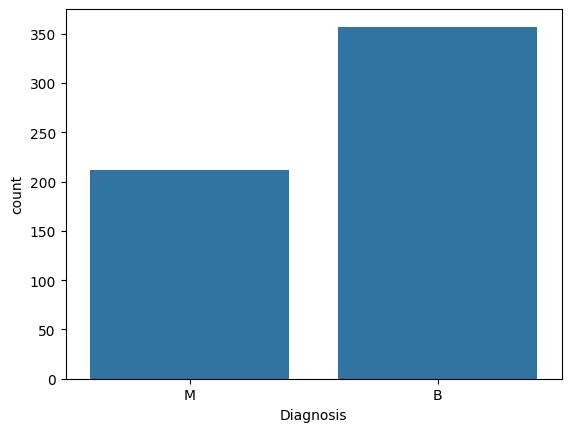

In [99]:
sns.countplot(x='Diagnosis', data=df)

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno)

In [100]:
df["DiagnosisNumeric"] = df["Diagnosis"].map({"B": 0, "M": 1})
df

,ID,Diagnosis,RadiusMean,RadiusSe,RadiusWorst,TextureMean,TextureSe,TextureWorst,PerimeterMean,PerimeterSe,...,ConcavePointsMean,ConcavePointsSe,ConcavePointsWorst,SymmetryMean,SymmetrySe,SymmetryWorst,FractalDimensionMean,FractalDimensionSe,FractalDimensionWorst,DiagnosisNumeric
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

In [101]:
for i in df.columns[2:]:
    df[i] = (df[i] - df[i].mean()) / df[i].std()

df

,ID,Diagnosis,RadiusMean,RadiusSe,RadiusWorst,TextureMean,TextureSe,TextureWorst,PerimeterMean,PerimeterSe,...,ConcavePointsMean,ConcavePointsSe,ConcavePointsWorst,SymmetryMean,SymmetrySe,SymmetryWorst,FractalDimensionMean,FractalDimensionSe,FractalDimensionWorst,DiagnosisNumeric
0,842302,M,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,1.296535
1,842517,M,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,1.296535
2,84300903,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,1.296535
3,84348301,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,1.296535
4,84358402,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,1.296535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,...,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,1.296535
565,926682,M,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,...,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,1.296535
566,926954,M,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,...,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,1.296535
567,927241,M,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,...,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,1.296535


9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.

In [102]:
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)

'holamundo'

In [103]:
col = ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]

radio_col = ['RadiusMean', 'RadiusSe', 'RadiusWorst']

textura_col = ['TextureMean', 'TextureSe', 'TextureWorst']

area_col = ['AreaMean', 'AreaSe', 'AreaWorst']

smoothness_col = ['SmoothnessMean', 'SmoothnessSe', 'SmoothnessWorst']

# Se juntan las columnas similares en grupos, aquí se trata de juntar características que miden mismos parámetros.

In [104]:
df[radio_col].head()

,RadiusMean,RadiusSe,RadiusWorst
0,1.096100,-2.071512,1.268817
1,1.828212,-0.353322,1.684473
2,1.578499,0.455786,1.565126
3,-0.768233,0.253509,-0.592166
4,1.748758,-1.150804,1.775011


In [105]:
df[textura_col].head()

,TextureMean,TextureSe,TextureWorst
0,0.983510,1.567087,3.280628
1,1.907030,-0.826235,-0.486643
2,1.557513,0.941382,1.052000
3,-0.763792,3.280667,3.399917
4,1.824624,0.280125,0.538866


In [106]:
df[area_col].head()

,AreaMean,AreaSe,AreaWorst
0,2.253764,2.487545,-0.564768
1,-0.867889,0.498816,-0.875473
2,-0.397658,1.227596,-0.779398
3,4.906602,0.326087,-0.110312
4,-0.561956,1.269426,-0.789549


In [107]:
df[smoothness_col].head()

,SmoothnessMean,SmoothnessSe,SmoothnessWorst
0,2.830540,2.485391,-0.213814
1,0.263095,0.741749,-0.604819
2,0.850180,1.180298,-0.296744
3,0.286341,-0.288125,0.689095
4,1.272070,1.189310,1.481763


In [108]:
df['RadiusGroupMean'] = df[radio_col].mean(axis=1)
df['TextureGroupMean'] = df[textura_col].mean(axis=1)
df['AreaGroupMean'] = df[area_col].mean(axis=1)
df['SmoothnessGroupMean'] = df[smoothness_col].mean(axis=1)
df

,ID,Diagnosis,RadiusMean,RadiusSe,RadiusWorst,TextureMean,TextureSe,TextureWorst,PerimeterMean,PerimeterSe,...,SymmetrySe,SymmetryWorst,FractalDimensionMean,FractalDimensionSe,FractalDimensionWorst,DiagnosisNumeric,RadiusGroupMean,TextureGroupMean,AreaGroupMean,SmoothnessGroupMean
0,842302,M,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,...,2.614365,2.107672,2.294058,2.748204,1.935312,1.296535,0.097801,1.943742,1.392180,1.700706
1,842517,M,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,...,-0.430066,-0.146620,1.086129,-0.243675,0.280943,1.296535,1.053121,0.198050,-0.414849,0.133342
2,84300903,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,...,1.081980,0.854222,1.953282,1.151242,0.201214,1.296535,1.199804,1.183632,0.016847,0.577911
3,84348301,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,...,3.889975,1.987839,2.173873,6.040726,4.930672,1.296535,-0.368963,1.972264,1.707459,0.229104
4,84358402,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,...,-0.313119,0.612640,0.728618,-0.867590,-0.396751,1.296535,0.790988,0.881205,-0.027360,1.314381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,...,-0.273077,0.663928,1.627719,-1.358963,-0.708467,1.296535,1.629650,1.200530,0.640130,2.021606
565,926682,M,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,...,-0.394473,0.236365,0.733182,-0.531387,-0.973122,1.296535,1.800389,0.602292,0.833542,0.674211
566,926954,M,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,...,0.350427,0.326479,0.413705,-1.103578,-0.318129,1.296535,1.139176,-0.100315,-0.322405,0.025994
567,927241,M,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,...,3.901415,3.194794,2.287972,1.917396,2.217684,1.296535,2.050636,2.175795,0.961727,0.757677


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

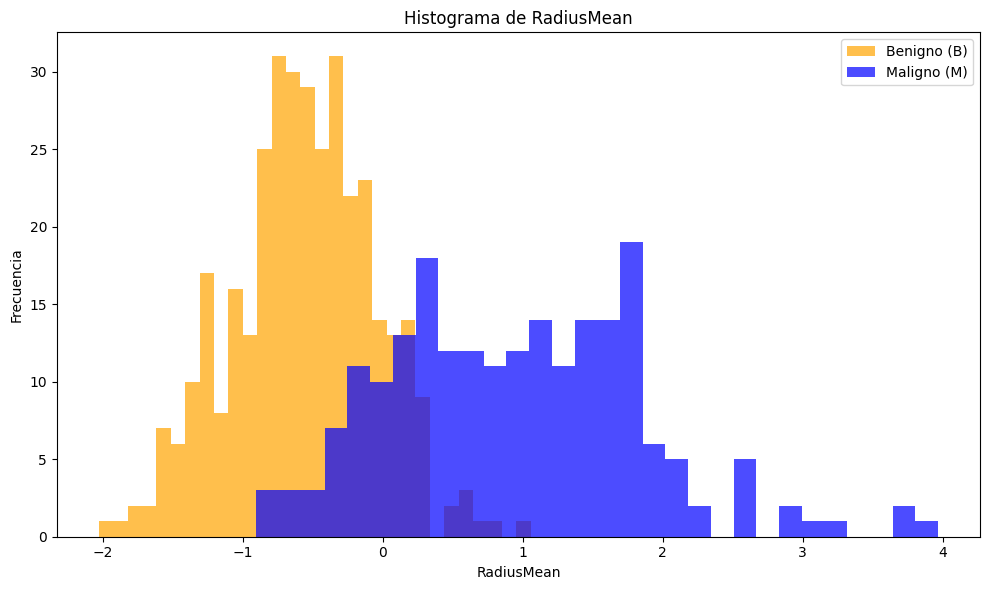

In [109]:
ben = df[df["Diagnosis"] == "B"]["RadiusMean"]
mal = df[df["Diagnosis"] == "M"]["RadiusMean"]

plt.figure(figsize=(10, 6))
plt.hist(ben, bins=30, color='orange', alpha=0.7, label='Benigno (B)')
plt.hist(mal, bins=30, color='blue', alpha=0.7, label='Maligno (M)')


plt.xlabel('RadiusMean')
plt.ylabel('Frecuencia')
plt.title('Histograma de RadiusMean')
plt.legend()
plt.tight_layout()
plt.show()

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)

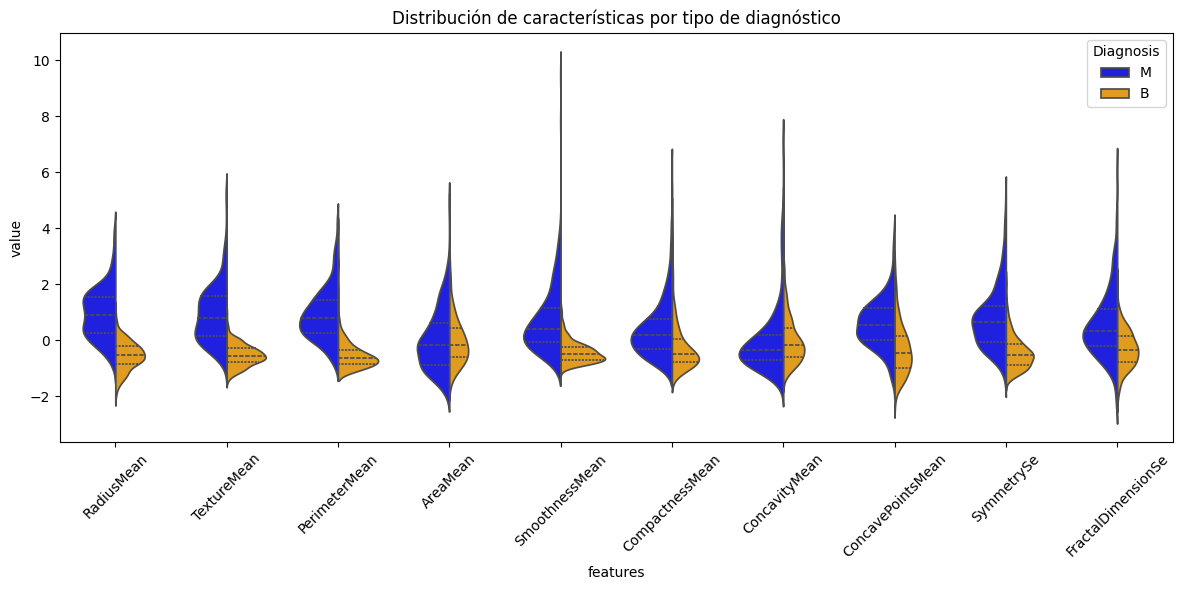

In [110]:
caract = [
    'RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean',
    'SmoothnessMean', 'CompactnessMean', 'ConcavityMean',
    'ConcavePointsMean', 'SymmetrySe', 'FractalDimensionSe'
]

data = pd.melt(df[caract + ['Diagnosis']],
               id_vars='Diagnosis',
               var_name='features',
               value_name='value')

plt.figure(figsize=(12, 6))
sns.violinplot(x='features', y='value', hue='Diagnosis', data=data,
               split=True, inner='quart', palette={'B': 'orange', 'M': 'blue'})

plt.title('Distribución de características por tipo de diagnóstico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Todos los graficos de violin solicitados para múltiples características.

12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

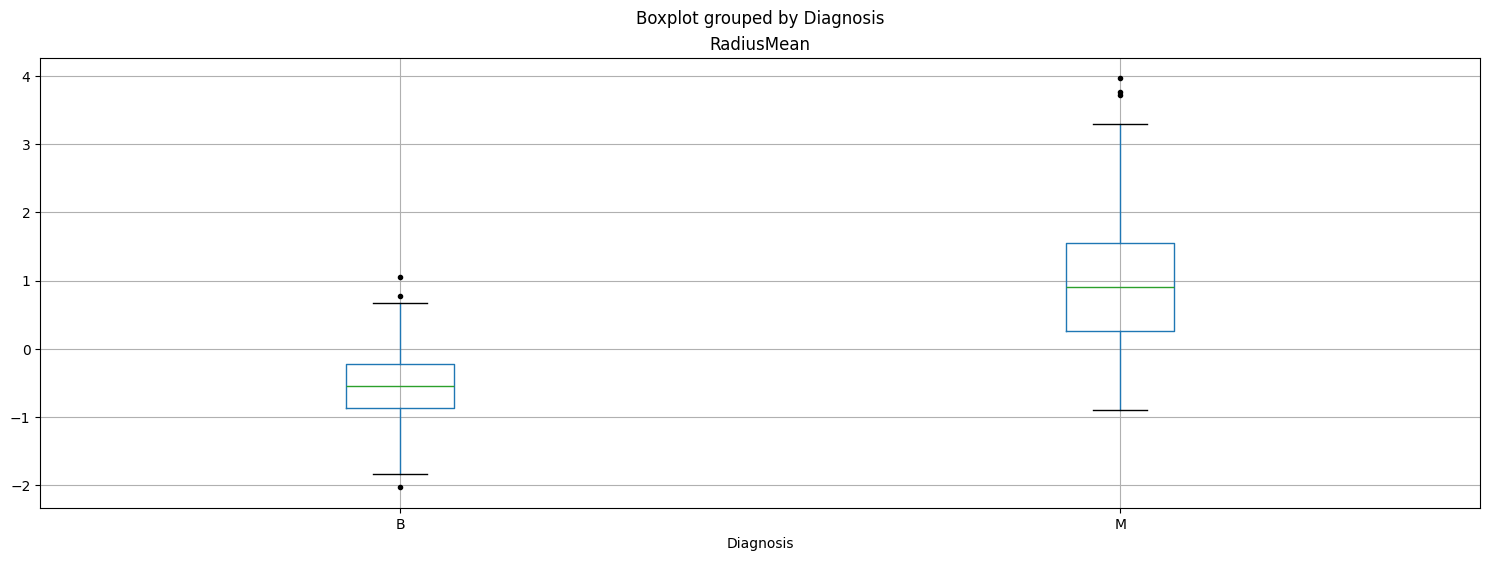

In [111]:
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))

In [112]:
column = ['RadiusMean', 'TextureMean', 'AreaMean']  # cambia según lo que necesites

for col in column:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR
    df = df[(df[col] >= min) & (df[col] <= max)]
    #Uso el criterio de los límites para aliminar los datos que estés por fuera

In [113]:
tamañoOriginal= (569, 32)
print("Tamaño tras eliminación de outliers:", df.shape)

Tamaño tras eliminación de outliers: (504, 37)


Aquí se pueden observar los datos que se eliminaron por ser atípicos y alejados de los rangos esperados. La diferencia es desde el df origninal, el extraido, hasta este momento. Se puede observar que hasta ahora se eliminaron alrededor de un 11% de los datos.



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

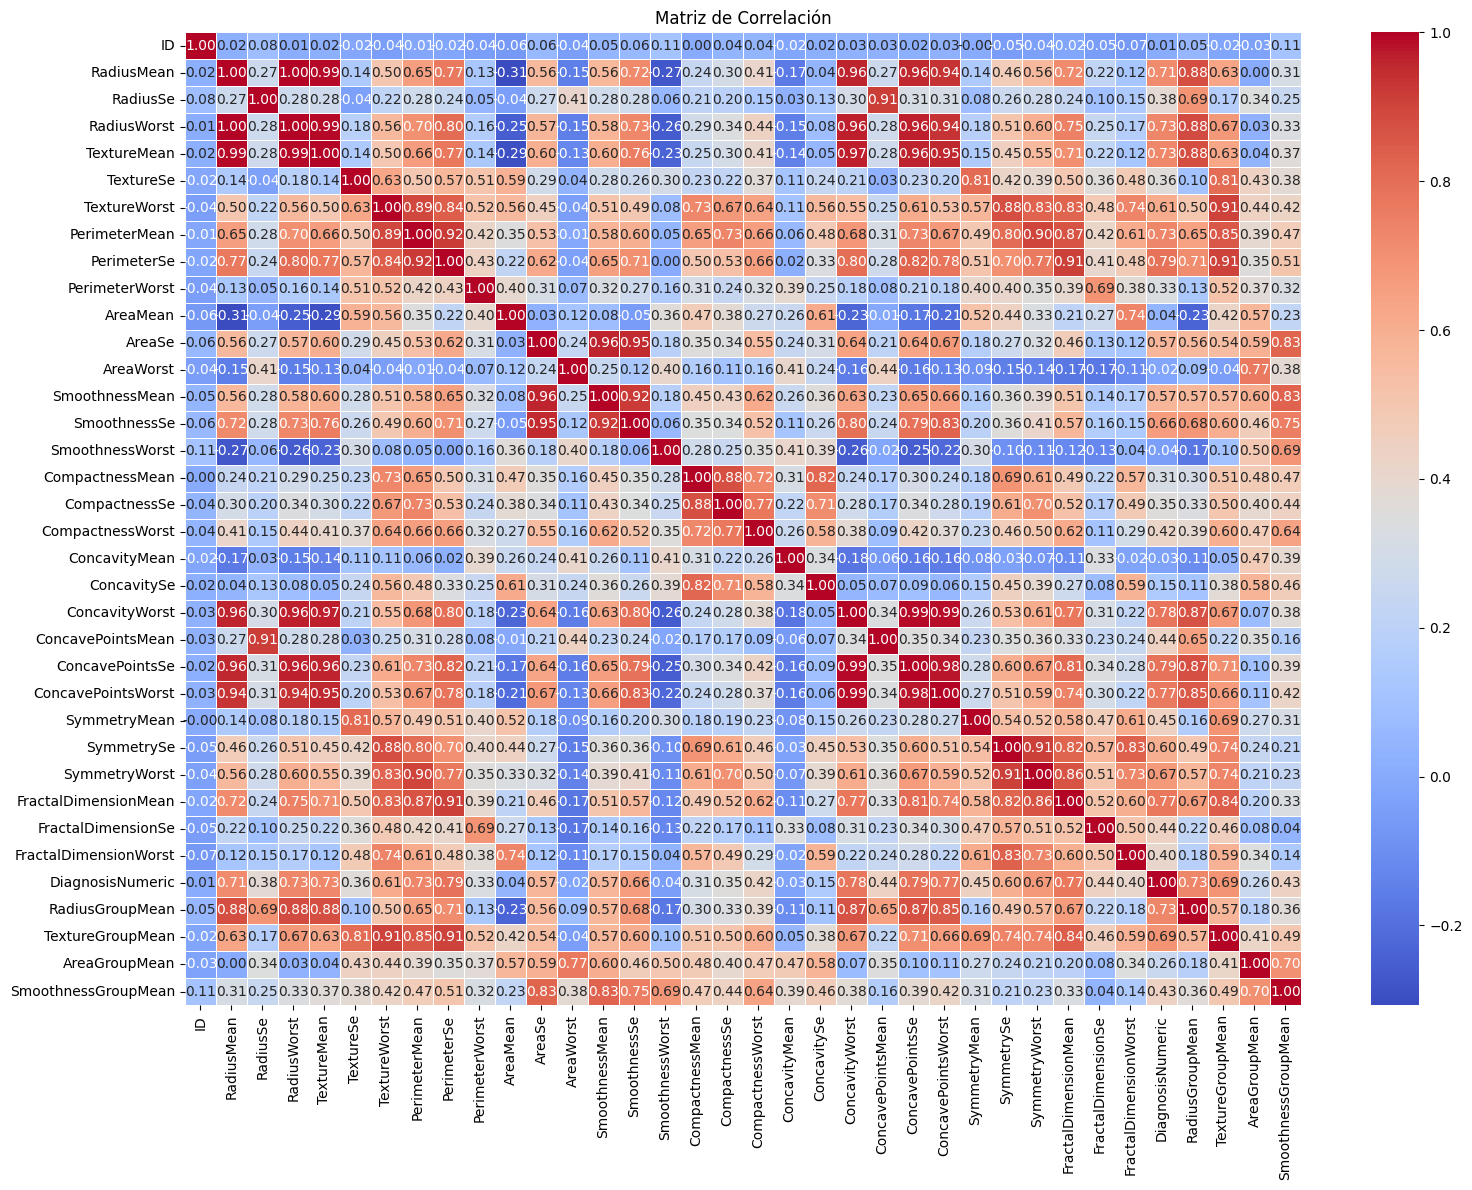

In [115]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16, 12))

sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=0.4)

plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

ahí está la matriz de correlación de todos las características numéricas del dataframe, donde está relacionado el color con la cantidad de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

A continuación se enumeran los posibles gráficos que ayudan a entender los datos con los que se cuenta:

Gráficos de Barras:
Muestran la frecuencia de ocurrencia de cada categoría en una variable categórica. Son útiles para verificar balance de clases, o ver la frecuencia de los diferentes casos.

Gráficos de Dispersión:
Permiten analizar la relación entre dos variables numéricas. Si se añade color por clase, también permiten observar agrupamientos. Con esto se pueden detectar correlaciones lineales o no lineales, identificar agrupaciones y patrones entre estas variables.

Gráficos de Densidad:
Estos permiten ver la probabilidad estimada de los valores de una variable continua. Sirven para comparar distribuciones entre grupos.

Clustermaps:
Ordenan filas y columnas de la matriz según similitud, mostrando posibles patrones de agrupación. Son usados par areducir las dimensiones y el análisis de patrones de todos los datos agrupamiento de variables similares.
Entre otros...